# Fanning the Flames - R version

### Package management

Much of the power of R comes from the external packages. The easiest way to install them is to use the install.packages command. For example, we'll be using RSQLite in this demo:

`install.packages("RSQLite", repos="https://cran.revolutionanalytics.com/")`

## 1: Importing data

In [3]:
# What directory are we in?
getwd()

[1] "/home/ra/host/BH_Analytics/Webinars/PythonVsR/R"

This is how you import a package in R. Do this _before_ you use it.

In [6]:
library("RSQLite")

In [15]:
# Connect to the user database (here, a SQLite DB)
con <- RSQLite::dbConnect(drv=RSQLite::SQLite(), dbname="../data/user_data.sql")

In [16]:
# List the tables
dbListTables(con)

[1] "user_accounts"

In [17]:
# Import user information to a data.frame
useRs_df <- dbGetQuery(con, 'SELECT * FROM user_accounts')

In [18]:
# count the users
dbGetQuery(con,'SELECT COUNT(*) FROM user_accounts' )

COUNT(*)
11000


In [19]:
# Get the account balances of users over the age of 30:
account_over30 <- dbGetQuery(con, "SELECT account_balance, user_id FROM user_accounts WHERE age > 30")
head(account_over30)

account_balance,user_id
3.409229,3174
16.086066,6161
1.110731,6598
1.159424,8217
1.501488,9978
2.327098,6928


In [20]:
# Yahoo have kindly offered a cross-promotion for our users.
# Select the users with a Yahoo email address:
yahoo_users <- dbGetQuery(con, "SELECT * FROM user_accounts WHERE email LIKE '%yahoo%'")

head(yahoo_users[c('first_name', 'last_name', 'email')])

first_name,last_name,email
Carlo,Logan,naturalistic2030@yahoo.com
Tiffaney,Rasmussen,alveolarly1829@yahoo.com
Mitchell,George,deidre1830@yahoo.com
Brian,Newton,moralistic2042@yahoo.com
Robbyn,Durham,dhooras1833@yahoo.com
Elanor,Browning,dauphine1885@yahoo.com


In [21]:
# Always a good policy to close your DB connection ASAP.
dbDisconnect(con)

The marketing people have the campaign stored in an Excel spreadsheet.

In [7]:
library("readxl")
campaign_df <- read_excel("../data/advertising_campaign.xlsx")
campaign_df

user_id,marketing_level,sales
7661,4,4.218709
5210,2,2.204847
9259,6,1.820096
6121,10,7.977467
4000,9,2.644286
6035,9,12.850856
4532,8,2.085011
9425,8,3.374722
9006,8,4.501643
655,5,4.267139


## 2: Exploratory Data Analysis I

We'll first look at the most important information: the users

In [22]:
# Size of the dataset
dim(useRs_df)

[1] 11000    12

In [23]:
# Names of columns:
names(useRs_df)

[1] "user_id"         "first_name"      "last_name"       "email"          
 [5] "password_hashed" "gender"          "address"         "age"            
 [9] "credit_card_num" "credit_card_exp" "security_answer" "account_balance"

In [24]:
# Quick look at the first few rows:
head(useRs_df)

user_id,first_name,last_name,email,password_hashed,gender,address,age,credit_card_num,credit_card_exp,security_answer,account_balance
3174,Mac,Gilbert,athrocyte2057@yandex.com,31dde7d51fb7ee6b6af7a44b480ea4eda40cdc5924e8d158a5eaed39def8812f4a055fa55fe02e71ad494f162984e6b08f83e96cfdd458d244e18a9ca56dad4c,Male,1387 Stonecrest Trail,63,4359 4286 7081 7388,06/25,lcd,3.409229
6161,Jacinto,Holloway,connelly2054@outlook.com,fb2a80887cafe2d0d81689915049478930f66ab07e9fa1c264fcebcff51be83ed8079c79229fd6c6211647f8c309c13cabd4c24aa5a70d23eb950e5a89e7a542,Fluid,796 China Basin Private,62,2641 4248 0712 8353,08/23,favorite,16.086066
5976,Yuko,Shaffer,carnell1945@gmail.com,d23bdf545afcf1d1fbf4ea482c6341944737a6ff4dfc15b6a7dff50b8c87900188fa70ad2611edf950ae463fe7b1a87e014b0ef5292f10f4fc9f517a7e7df107,Fluid,973 Maynard Wynd,30,4111 6457 8815 1058,11/18,luxury,1.646357
6598,Carlo,Logan,naturalistic2030@yahoo.com,ca515ffc7c3e2019b0189203b52fd7084c7ddaf80acfdb62f2cb994321512e003f2b19d1620f81eb1efe0d5754baef01e222349c408a414970e2298d4752e7c0,Fluid,499 Rockdale High Street,39,3406 509987 49643,09/18,compilation,1.110731
8217,Sandee,Wolfe,normoblastic1896@outlook.com,8a314c766a35b29aeeabc0a2bef789f296814ef2d87b78288ad5507b825c81c14b485c398c8eb5d51b30953e32d19f74b55a65574206aeb74d913eb2c1ab5688,Fluid,289 Harlan Line,38,5464 5693 4366 2146,06/21,alexander,1.159424
9978,Bennie,Witt,dumper1986@live.com,2a175e15b08b4cd580c39addd27fcf89b6104be35c0ec1001c801dea79fe57ced9f230bacee9a519fb51b73223eac2bb061c81f1645bddc5ffcfaabbc98e0956,Male,1211 Pioche Row,48,4932 8032 6745 1955,08/16,hybrid,1.501488


In [25]:
# Access the age column only:
head(useRs_df$age, 10)

[1] 63 62 30 39 38 48 56 34 34 41

In [26]:
# Alternatively:
head(useRs_df["age"], 10)

age
63
62
30
39
38
48
56
34
34
41


In [27]:
# Get a neat summary of each column, including data types etc.
str(useRs_df)

'data.frame':	11000 obs. of  12 variables:
 $ user_id        : int  3174 6161 5976 6598 8217 9978 6928 9143 8682 9680 ...
 $ first_name     : chr  "Mac" "Jacinto" "Yuko" "Carlo" ...
 $ last_name      : chr  "Gilbert" "Holloway" "Shaffer" "Logan" ...
 $ email          : chr  "athrocyte2057@yandex.com" "connelly2054@outlook.com" "carnell1945@gmail.com" "naturalistic2030@yahoo.com" ...
 $ password_hashed: chr  "31dde7d51fb7ee6b6af7a44b480ea4eda40cdc5924e8d158a5eaed39def8812f4a055fa55fe02e71ad494f162984e6b08f83e96cfdd458d"| __truncated__ "fb2a80887cafe2d0d81689915049478930f66ab07e9fa1c264fcebcff51be83ed8079c79229fd6c6211647f8c309c13cabd4c24aa5a70d2"| __truncated__ "d23bdf545afcf1d1fbf4ea482c6341944737a6ff4dfc15b6a7dff50b8c87900188fa70ad2611edf950ae463fe7b1a87e014b0ef5292f10f"| __truncated__ "ca515ffc7c3e2019b0189203b52fd7084c7ddaf80acfdb62f2cb994321512e003f2b19d1620f81eb1efe0d5754baef01e222349c408a414"| __truncated__ ...
 $ gender         : chr  "Male" "Fluid" "Fluid" "Fluid" ...
 $ addres

In [28]:
# Get some descriptive statistics for the numerical data:
summary(useRs_df)

    user_id      first_name         last_name            email          
 Min.   :   0   Length:11000       Length:11000       Length:11000      
 1st Qu.:2500   Class :character   Class :character   Class :character  
 Median :4992   Mode  :character   Mode  :character   Mode  :character  
 Mean   :5000                                                           
 3rd Qu.:7504                                                           
 Max.   :9999                                                           
 password_hashed       gender            address               age       
 Length:11000       Length:11000       Length:11000       Min.   :16.00  
 Class :character   Class :character   Class :character   1st Qu.:28.00  
 Mode  :character   Mode  :character   Mode  :character   Median :41.00  
                                                          Mean   :41.08  
                                                          3rd Qu.:54.00  
                                             

In [29]:
# Alternatively:
library("Hmisc")
describe(useRs_df)

useRs_df 

 12  Variables      11000  Observations
--------------------------------------------------------------------------------
user_id 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   11000        0    10000        1     5000     3335      504     1003 
     .25      .50      .75      .90      .95 
    2500     4992     7504     9002     9506 

lowest :    0    1    2    3    4, highest: 9995 9996 9997 9998 9999
--------------------------------------------------------------------------------
first_name 
       n  missing distinct 
   11000        0     3060 

lowest : Aaron   Abe     Abel    Abraham Abram  
highest: Zita    Zofia   Zonia   Zulema  Zulma  
--------------------------------------------------------------------------------
last_name 
       n  missing distinct 
   11000        0     1000 

lowest : Abbott    Acevedo   Acosta    Adams     Adkins   
highest: Yates     York      Young     Zamora    Zimmerman
------------------------------------

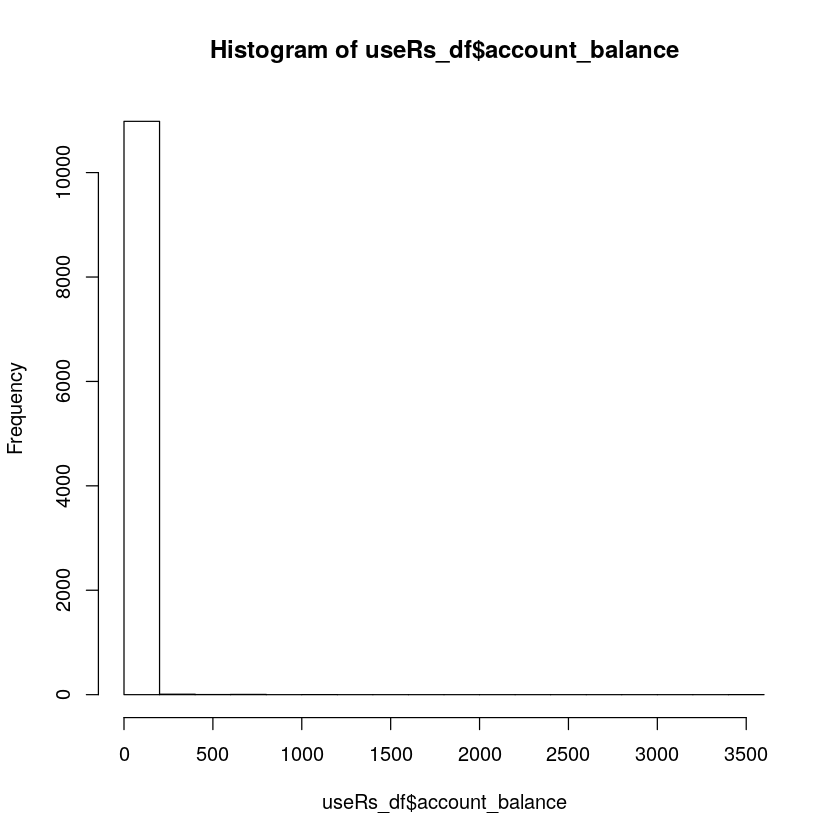

In [30]:
# Univariate description of account balances:
hist(useRs_df$account_balance)

Brutal! Perhaps, like many resource distributions, this is a Pareto distribution. This will be clear if we log-transform the data:

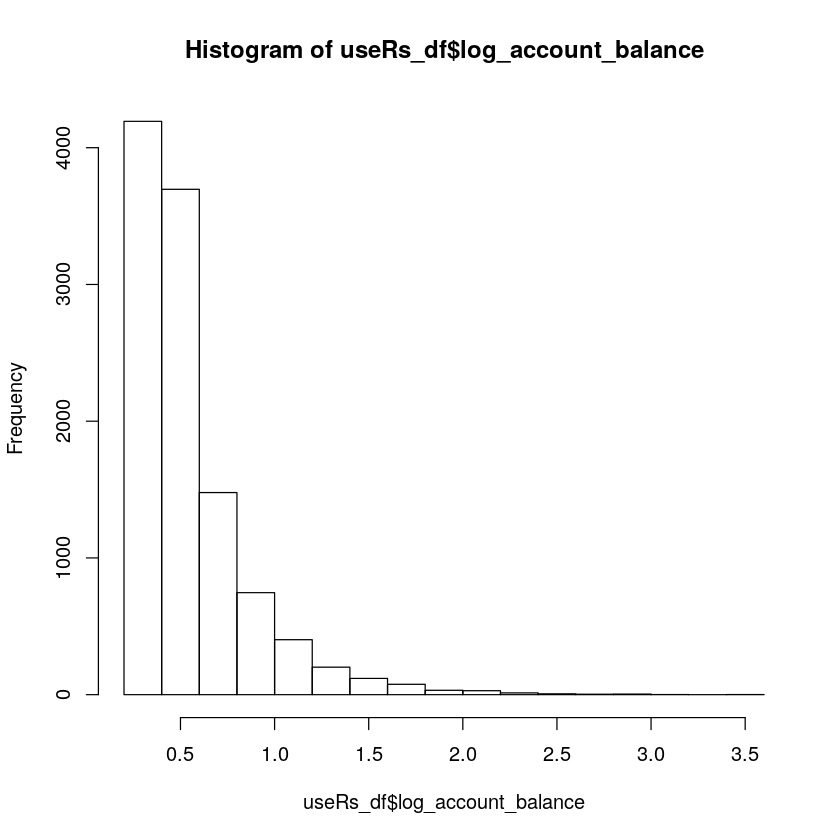

In [31]:
useRs_df$log_account_balance <- log10(useRs_df$account_balance + 1)
hist(useRs_df$log_account_balance)

In [32]:
# Quantify the missingness:
sum(is.na(useRs_df))  # 2195
summary(is.na(useRs_df))

[1] 2195

  user_id        first_name      last_name         email        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:11000     FALSE:11000     FALSE:11000     FALSE:11000    
                                                                
 password_hashed   gender         address           age         
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:11000     FALSE:9903      FALSE:9902      FALSE:11000    
                 TRUE :1097      TRUE :1098                     
 credit_card_num credit_card_exp security_answer account_balance
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:11000     FALSE:11000     FALSE:11000     FALSE:11000    
                                                                
 log_account_balance
 Mode :logical      
 FALSE:11000        
                    

In [33]:
# We don't need the address column:
useRs_df$address <- NULL

In [34]:
# We could change the default value of missing gender:
useRs_df[is.na(useRs_df)] <- "Unknown"
sample(useRs_df, 5)

describe(useRs_df)

sum(is.na(useRs_df$gender))  #  None

credit_card_exp,email,account_balance,gender,password_hashed
06/25,athrocyte2057@yandex.com,3.409229,Male,31dde7d51fb7ee6b6af7a44b480ea4eda40cdc5924e8d158a5eaed39def8812f4a055fa55fe02e71ad494f162984e6b08f83e96cfdd458d244e18a9ca56dad4c
08/23,connelly2054@outlook.com,16.086066,Fluid,fb2a80887cafe2d0d81689915049478930f66ab07e9fa1c264fcebcff51be83ed8079c79229fd6c6211647f8c309c13cabd4c24aa5a70d23eb950e5a89e7a542
11/18,carnell1945@gmail.com,1.646357,Fluid,d23bdf545afcf1d1fbf4ea482c6341944737a6ff4dfc15b6a7dff50b8c87900188fa70ad2611edf950ae463fe7b1a87e014b0ef5292f10f4fc9f517a7e7df107
09/18,naturalistic2030@yahoo.com,1.110731,Fluid,ca515ffc7c3e2019b0189203b52fd7084c7ddaf80acfdb62f2cb994321512e003f2b19d1620f81eb1efe0d5754baef01e222349c408a414970e2298d4752e7c0
06/21,normoblastic1896@outlook.com,1.159424,Fluid,8a314c766a35b29aeeabc0a2bef789f296814ef2d87b78288ad5507b825c81c14b485c398c8eb5d51b30953e32d19f74b55a65574206aeb74d913eb2c1ab5688
08/16,dumper1986@live.com,1.501488,Male,2a175e15b08b4cd580c39addd27fcf89b6104be35c0ec1001c801dea79fe57ced9f230bacee9a519fb51b73223eac2bb061c81f1645bddc5ffcfaabbc98e0956
11/16,deviated1875@outlook.com,2.327098,Other,d0dd4b60a740b50815d46267c224cc49789f12eed695cd8783310e55977ba6afedefbc329c2f4e33a0cf42240e48b5aa41e9f957572c3ade5567fde89350761e
06/16,aeschylus2044@yandex.com,3.260695,Other,9de5fadcf22bf0eafcecbb37b85a79751beefcf5bc81a82895b29f3bc46cf8b954c6a58db8219b608e847bd0e8dfd7d59dde4064e93a55e06ac1da6dbf13f035
05/21,suprachorioidal1986@gmail.com,4.305119,Female,937e64d0d80913ab5def66a76dc1f93b400f44d839c194c39815675ca063fdfc05998b4105923c248b5445975d88d5a00156693c5dd966bf17926bf3741dbc21
12/20,fastening1972@gmail.com,1.084477,Unknown,7b5c856d03d05343ce4d47bce0d5520e2f29382c1f5b0dc043d61abfff6cffafd7070310c4a98c505f3abc713f63bf42c63a250e29bfcfcd6c63deb74399411e


useRs_df 

 12  Variables      11000  Observations
--------------------------------------------------------------------------------
user_id 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   11000        0    10000        1     5000     3335      504     1003 
     .25      .50      .75      .90      .95 
    2500     4992     7504     9002     9506 

lowest :    0    1    2    3    4, highest: 9995 9996 9997 9998 9999
--------------------------------------------------------------------------------
first_name 
       n  missing distinct 
   11000        0     3060 

lowest : Aaron   Abe     Abel    Abraham Abram  
highest: Zita    Zofia   Zonia   Zulema  Zulma  
--------------------------------------------------------------------------------
last_name 
       n  missing distinct 
   11000        0     1000 

lowest : Abbott    Acevedo   Acosta    Adams     Adkins   
highest: Yates     York      Young     Zamora    Zimmerman
------------------------------------

[1] 0

In [35]:
# Get dupes:
sum(duplicated(useRs_df))
dim(unique(useRs_df))

[1] 1000

[1] 10000    12

In [36]:
# Drop duplicates
useRs_df <- unique(useRs_df)

In [37]:
# Merge the user data and the corresponding advertising campaign data
library("dplyr")
data_df <- merge(x=useRs_df, y=campaign_df, by="user_id", all.x=TRUE)

dim(data_df)
names(data_df)
sum(duplicated(useRs_df))
sum(is.na(useRs_df))

[1] 10000    14

[1] "user_id"             "first_name"          "last_name"          
 [4] "email"               "password_hashed"     "gender"             
 [7] "age"                 "credit_card_num"     "credit_card_exp"    
[10] "security_answer"     "account_balance"     "log_account_balance"
[13] "marketing_level"     "sales"

[1] 0

[1] 0

## 3: Visualization

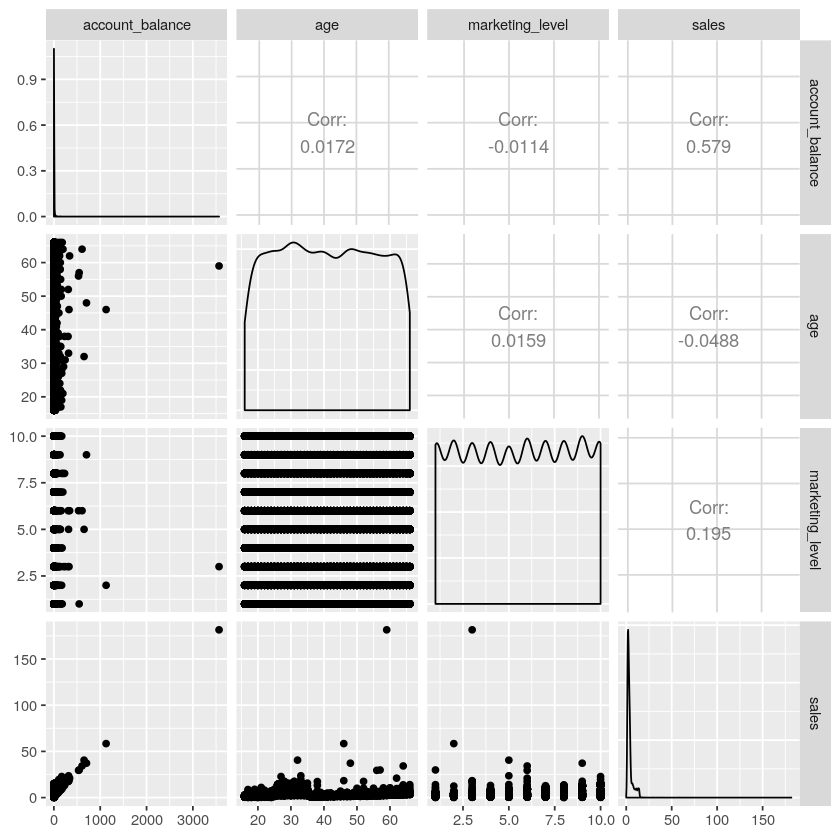

In [39]:
library("GGally")
ggpairs(data_df[c("account_balance", "age", "marketing_level", "sales")])

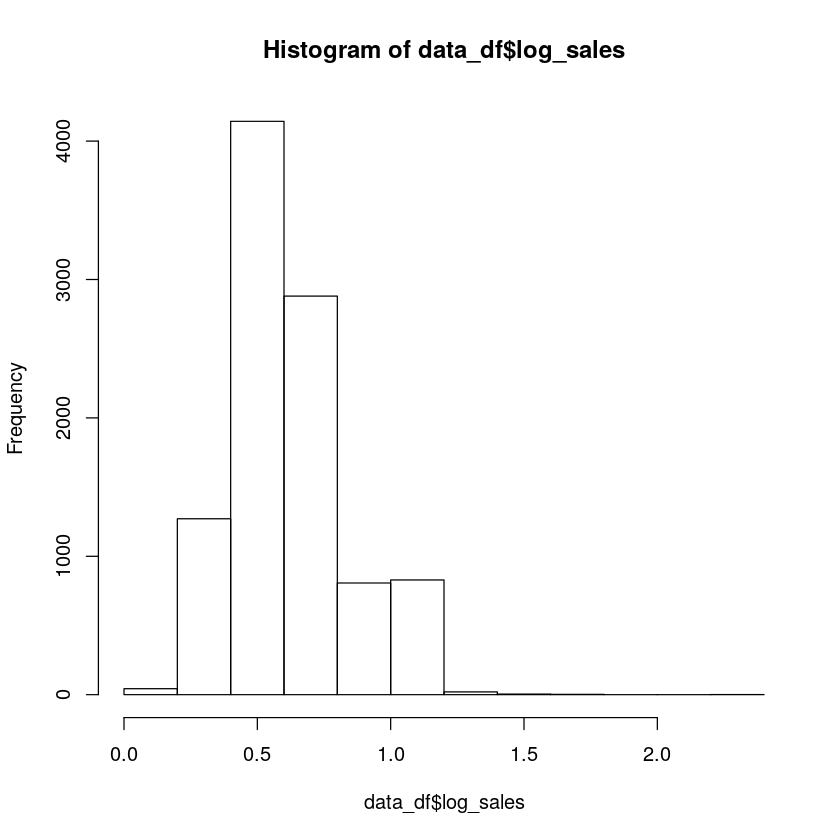

In [40]:
data_df$log_sales <- log10(data_df$sales + 1)
hist(data_df$log_sales)

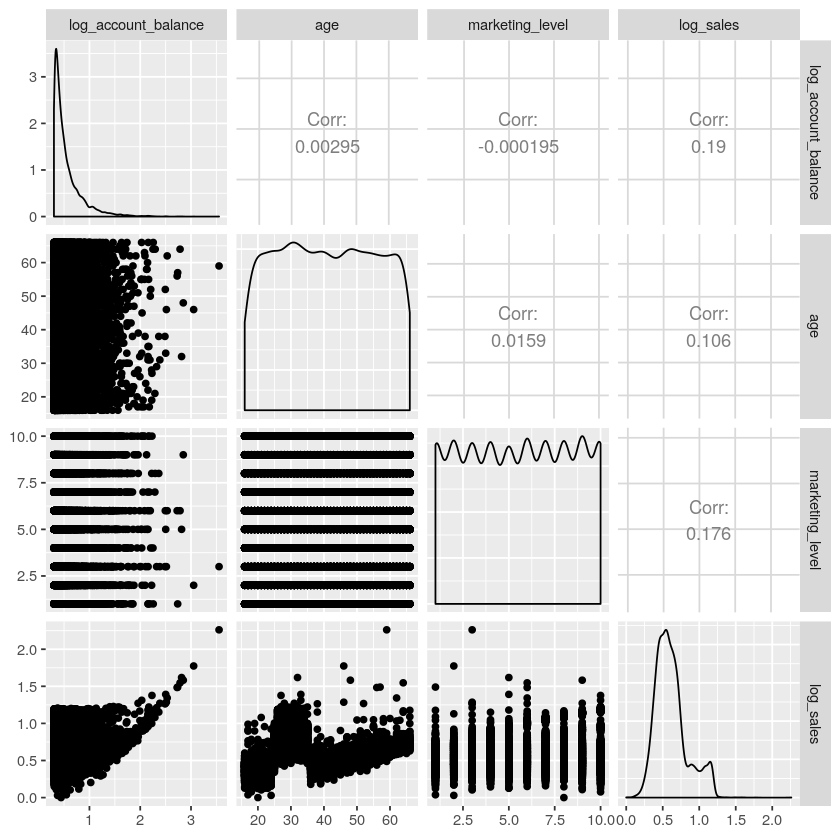

In [41]:
ggpairs(data_df[c("log_account_balance", "age", "marketing_level", "log_sales")])

## 4: Exploratory Data Analysis II and hypothesis testing

Does the marketing level have any effect on sales?

In [42]:
data_df %>%
    group_by(marketing_level) %>%
    summarise(mean_sales=mean(sales))

marketing_level,mean_sales
1,2.600379
2,2.915733
3,3.396971
4,3.470250
5,3.674082
6,3.901185
7,3.995114
8,4.289784
9,4.731334
10,4.936115


Looks like it's linear!


Upon discussion, marketing finally(!) let us know that their advertising campaign was
targeted at customers between the ages of 25 and 35. Was this campaign effective?

In [43]:
data_df$age_demographic <- as.factor(ifelse(data_df$age >= 25 & data_df$age <=35, "yes", "no"))

data_df %>%
    group_by(age_demographic) %>%
    summarise(mean_sales=mean(sales))

age_demographic,mean_sales
no,2.613189
yes,7.911501


It appears so!

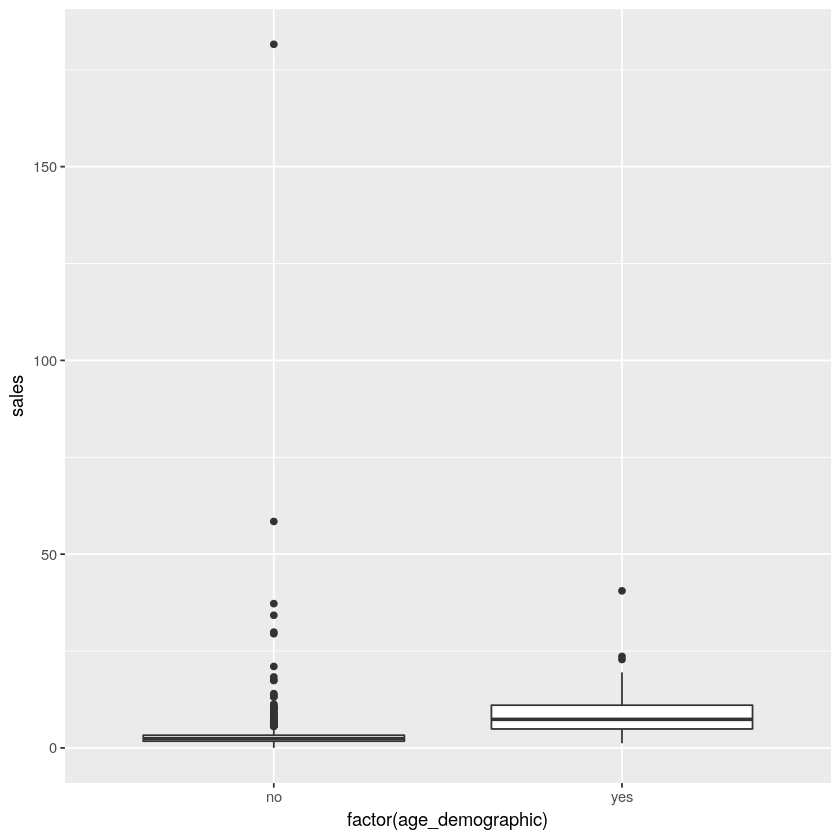

In [44]:
library(ggplot2)
ggplot(data_df, aes(y=sales, x=factor(age_demographic))) + geom_boxplot()

OK, looks like we're swamped by outliers. Time for the log-transformed version:

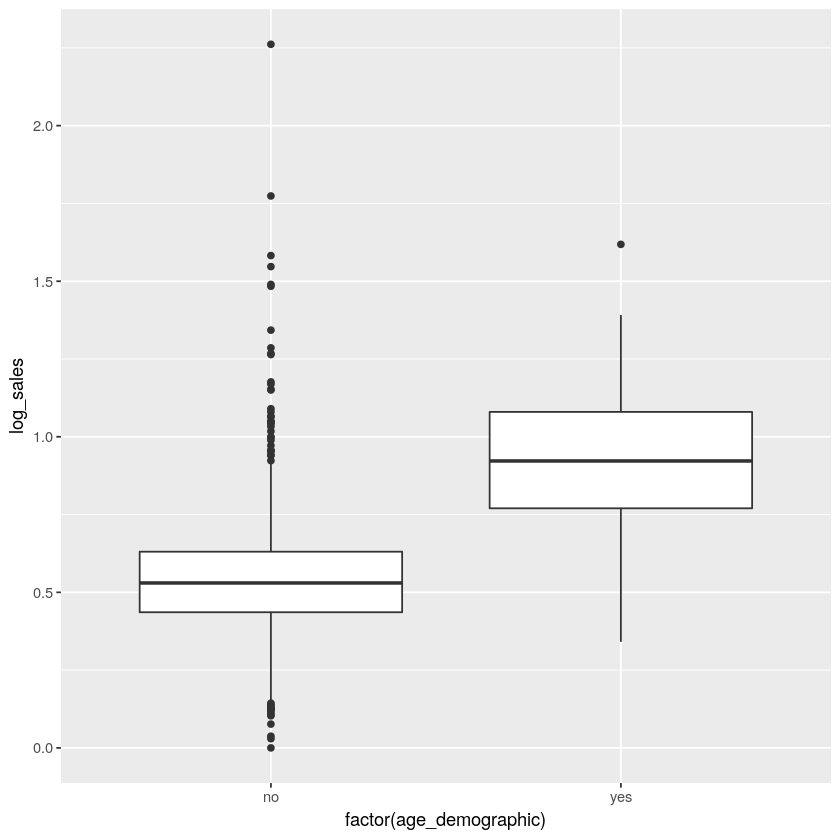

In [45]:
ggplot(data_df, aes(y=log_sales, x=factor(age_demographic))) + geom_boxplot()

Nice.

In [46]:
t.test(sales ~ age_demographic, data=data_df, var.equal=TRUE)


	Two Sample t-test

data:  sales by age_demographic
t = -77.417, df = 9998, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.432465 -5.164158
sample estimates:
 mean in group no mean in group yes 
         2.613189          7.911501 


As expected: highly significant

In [49]:
cor.test( ~ account_balance + sales, data=data_df)


	Pearson's product-moment correlation

data:  account_balance and sales
t = 71.072, df = 9998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5661814 0.5922274
sample estimates:
      cor 
0.5793523 


## 5: Linear Regression

In [50]:
# Null model: intercept only 
mod_null <- lm(sales ~ 1, data=data_df)

summary(mod_null)


Call:
lm(formula = sales ~ 1, data = data_df)

Residuals:
    Min      1Q  Median      3Q     Max 
 -3.796  -1.900  -1.018   0.343 177.778 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.79577    0.03604   105.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.604 on 9999 degrees of freedom


In [51]:
# Single factor: account balance
mod0 <- lm(sales ~ account_balance, data=data_df)

summary(mod0)


Call:
lm(formula = sales ~ account_balance, data = data_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6234 -1.7984 -0.9627  0.3629 11.3991 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.5355274  0.0296030  119.43   <2e-16 ***
account_balance 0.0498526  0.0007014   71.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.938 on 9998 degrees of freedom
Multiple R-squared:  0.3356,	Adjusted R-squared:  0.3356 
F-statistic:  5051 on 1 and 9998 DF,  p-value: < 2.2e-16


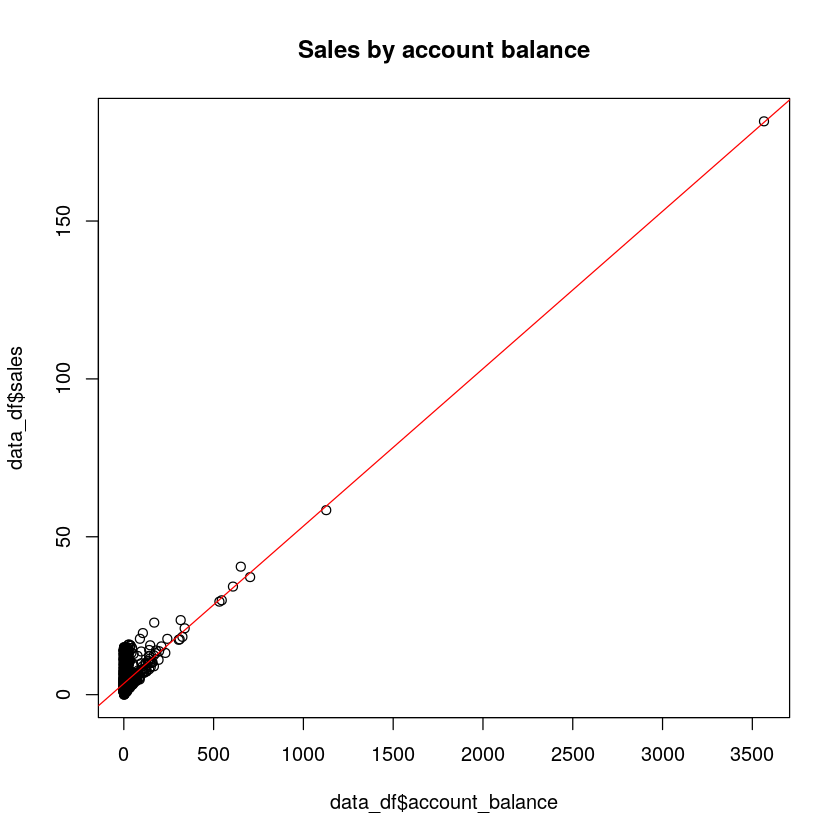

In [52]:
plot(data_df$account_balance, data_df$sales, main="Sales by account balance")

abline(mod0, col="red")

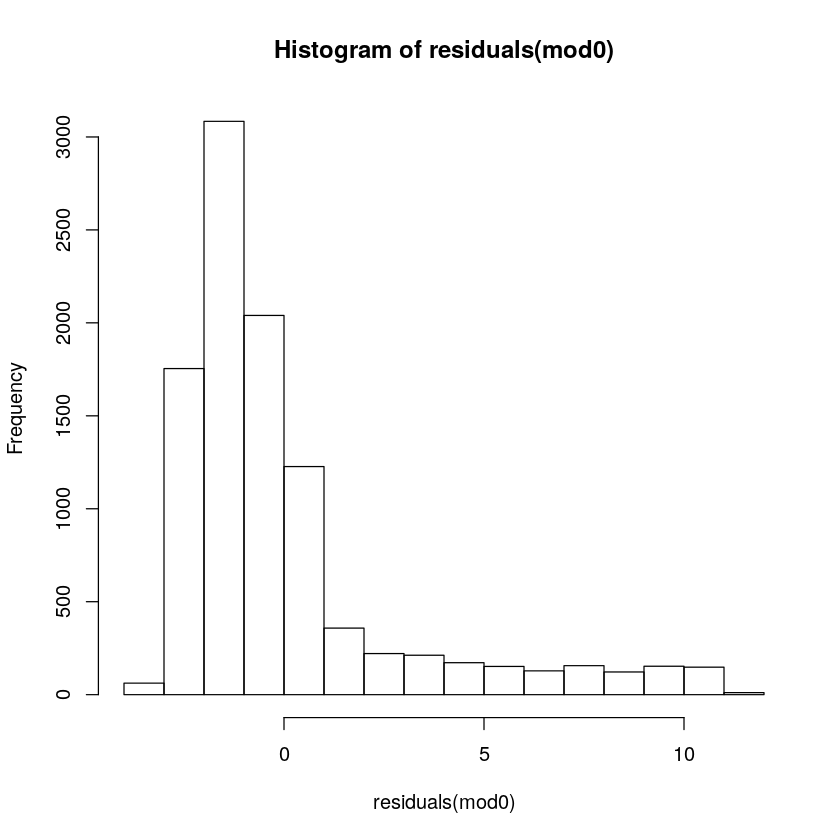

In [53]:
hist(residuals(mod0))

In [54]:
# Check the effect of age demographic on sales
modDemographic <- lm(sales ~ age_demographic, data=data_df)
summary(modDemographic)


Call:
lm(formula = sales ~ age_demographic, data = data_df)

Residuals:
    Min      1Q  Median      3Q     Max 
 -6.718  -1.026  -0.244   0.853 178.960 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.61319    0.03233   80.82   <2e-16 ***
age_demographicyes  5.29831    0.06844   77.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.85 on 9998 degrees of freedom
Multiple R-squared:  0.3748,	Adjusted R-squared:  0.3747 
F-statistic:  5993 on 1 and 9998 DF,  p-value: < 2.2e-16


In [55]:
# Single factor: age
mod1 <- lm(sales ~ age, data=data_df)

summary(mod1)


Call:
lm(formula = sales ~ age, data = data_df)

Residuals:
    Min      1Q  Median      3Q     Max 
 -4.048  -1.943  -0.931   0.523 177.992 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.287287   0.106942  40.090  < 2e-16 ***
age         -0.011973   0.002453  -4.881 1.07e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.6 on 9998 degrees of freedom
Multiple R-squared:  0.002377,	Adjusted R-squared:  0.002277 
F-statistic: 23.82 on 1 and 9998 DF,  p-value: 1.072e-06


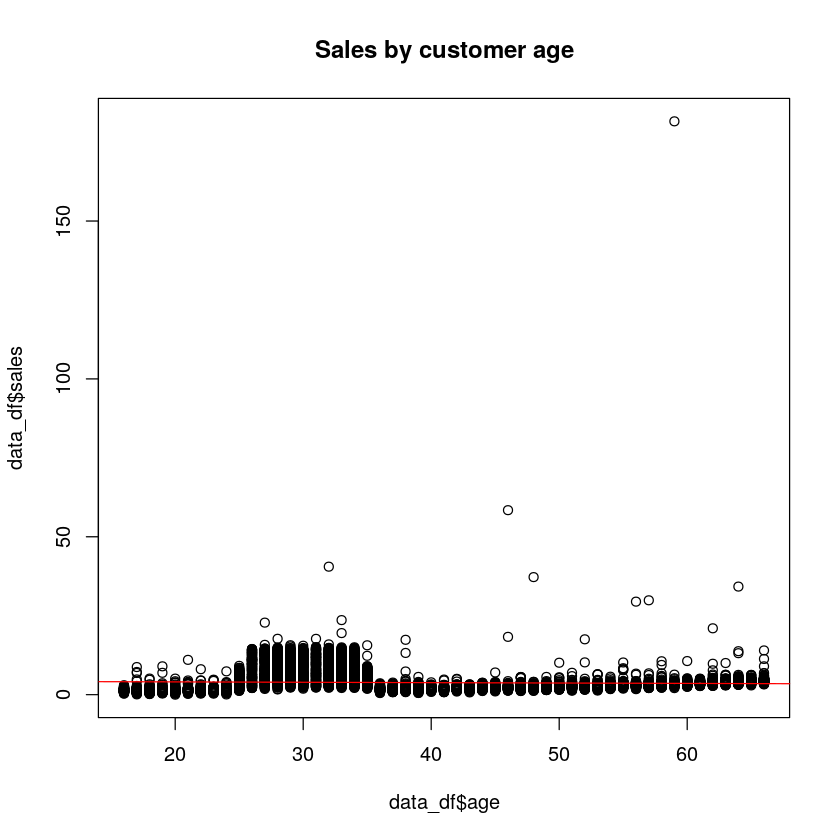

In [56]:
plot(data_df$age, data_df$sales, main="Sales by customer age")

abline(mod1, col="red")

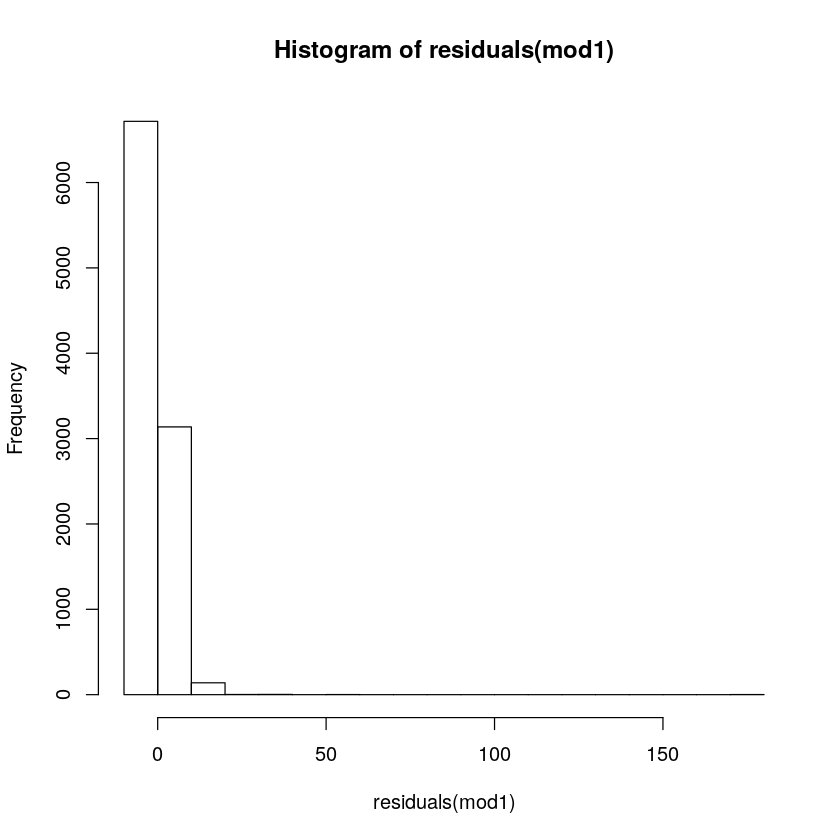

In [57]:
hist(residuals(mod1))

In [58]:
# Polynomial in age
mod1b <- lm(sales ~ age + I(age**2), data=data_df)

summary(mod1b)


Call:
lm(formula = sales ~ age + I(age^2), data = data_df)

Residuals:
    Min      1Q  Median      3Q     Max 
 -3.806  -2.040  -1.066   0.833 178.153 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.980770   0.294887   6.717 1.96e-11 ***
age          0.116451   0.015503   7.511 6.35e-14 ***
I(age^2)    -0.001560   0.000186  -8.389  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.587 on 9997 degrees of freedom
Multiple R-squared:  0.00935,	Adjusted R-squared:  0.009152 
F-statistic: 47.18 on 2 and 9997 DF,  p-value: < 2.2e-16


Warning message in abline(mod1b, col = "red"):
“only using the first two of 3 regression coefficients”

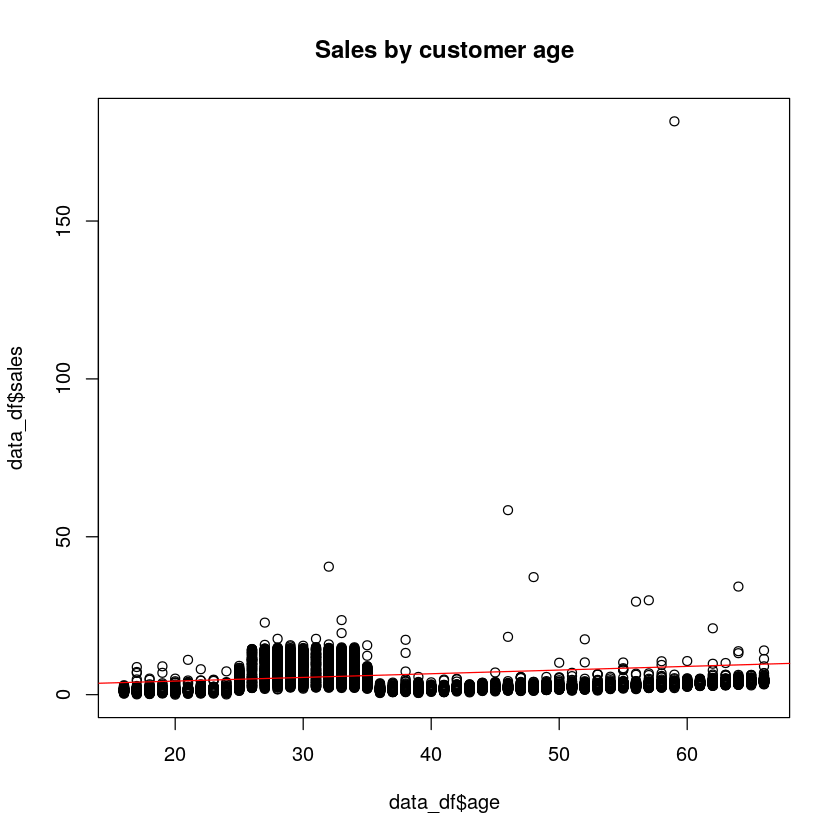

In [59]:
plot(data_df$age, data_df$sales, main="Sales by customer age")

abline(mod1b, col="red")

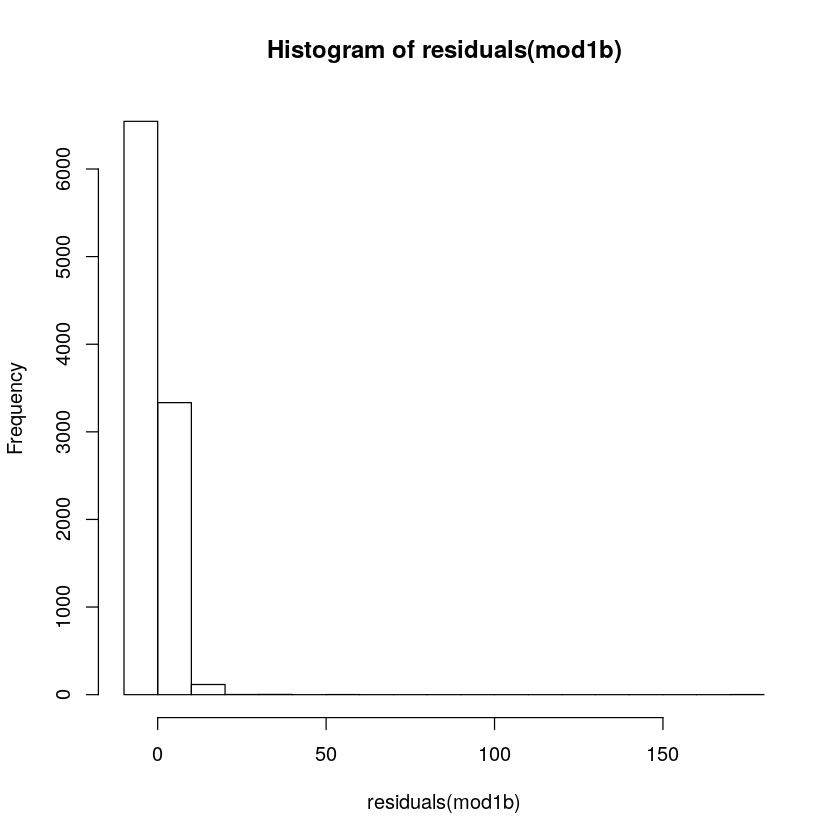

In [60]:
hist(residuals(mod1b))

Warning message in plot.window(...):
“"spread" is not a graphical parameter”Warning message in plot.window(...):
“"lty.smooth" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"spread" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"lty.smooth" is not a graphical parameter”Warning message in title(...):
“"spread" is not a graphical parameter”Warning message in title(...):
“"lty.smooth" is not a graphical parameter”Warning message in plot.window(...):
“"spread" is not a graphical parameter”Warning message in plot.window(...):
“"lty.smooth" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"spread" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"lty.smooth" is not a graphical parameter”Warning message in title(...):
“"spread" is not a graphical parameter”Warning message in title(...):
“"lty.smooth" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, .

“"lty.smooth" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"spread" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"lty.smooth" is not a graphical parameter”Warning message in title(...):
“"spread" is not a graphical parameter”Warning message in title(...):
“"lty.smooth" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"spread" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"lty.smooth" is not a graphical parameter”Warning message in plot.window(...):
“"spread" is not a graphical parameter”Warning message in plot.window(...):
“"lty.smooth" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"spread" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"lty.smooth" is not a graphical parameter”Warning message in title(...):
“"spread" is not a graphical parameter”Warning message in title(...):


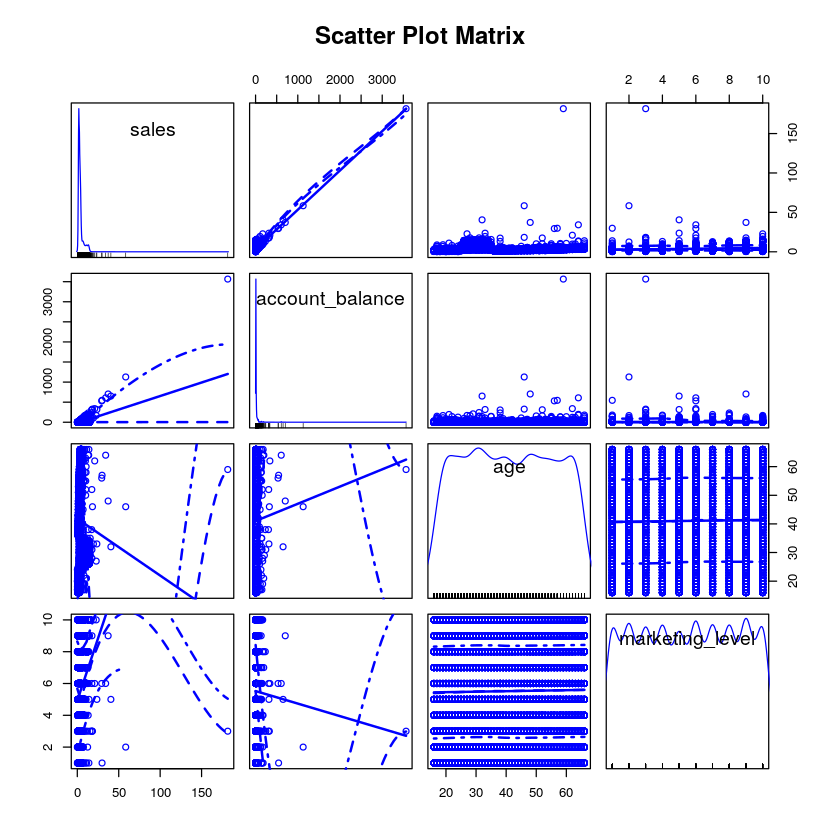

In [61]:
# Clues for multilinear regression
library(car)

scatterplotMatrix(data_df[c('sales', 'account_balance', 'age', 'marketing_level')],
                  spread=FALSE,
                  lty.smooth=2,
                  main="Scatter Plot Matrix")

In [62]:
mod2 <- lm(sales ~ age + I(age**2) + age_demographic + marketing_level 
           + account_balance, data=data_df)

summary(mod2)


Call:
lm(formula = sales ~ age + I(age^2) + age_demographic + marketing_level + 
    account_balance, data = data_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4006 -0.8288 -0.0367  0.7629  6.0968 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.263e-01  1.342e-01   4.666 3.12e-06 ***
age                -6.674e-02  7.001e-03  -9.533  < 2e-16 ***
I(age^2)            1.501e-03  8.532e-05  17.590  < 2e-16 ***
age_demographicyes  6.304e+00  4.317e-02 146.031  < 2e-16 ***
marketing_level     2.515e-01  5.514e-03  45.606  < 2e-16 ***
account_balance     5.009e-02  3.807e-04 131.590  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.594 on 9994 degrees of freedom
Multiple R-squared:  0.8045,	Adjusted R-squared:  0.8044 
F-statistic:  8226 on 5 and 9994 DF,  p-value: < 2.2e-16


In [63]:
mod3 <- lm(sales ~ age + I(age**2) + marketing_level:age_demographic 
           + account_balance, data=data_df)

summary(mod3)


Call:
lm(formula = sales ~ age + I(age^2) + marketing_level:age_demographic + 
    account_balance, data = data_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8943 -0.2773  0.0592  0.4040  2.2713 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         2.032e+00  6.910e-02  29.405   <2e-16 ***
age                                -6.705e-02  3.580e-03 -18.726   <2e-16 ***
I(age^2)                            1.509e-03  4.347e-05  34.721   <2e-16 ***
account_balance                     5.000e-02  1.955e-04 255.766   <2e-16 ***
marketing_level:age_demographicno  -3.147e-03  2.935e-03  -1.072    0.284    
marketing_level:age_demographicyes  1.142e+00  3.912e-03 291.920   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8184 on 9994 degrees of freedom
Multiple R-squared:  0.9485,	Adjusted R-squared:  0.9484 
F-statistic: 3.678e+04 on 5 and 9994 DF,  p

### Prediction

In [64]:
pred_df <- expand.grid("age"=seq(16, 65, 5),
              "age_demographic"=c("yes","no"),
              "account_balance"=seq(0, 1000, 10),
              "marketing_level"=1:10 )

Predict new results

In [65]:
pred_df$sales_pred <- predict(mod3, pred_df)

Visualize these results

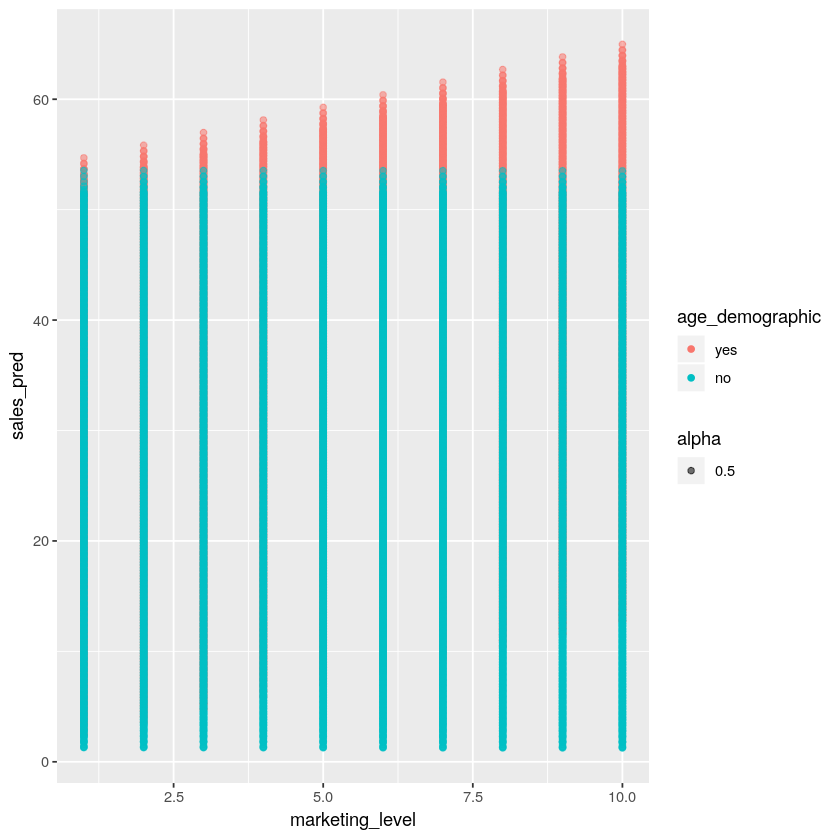

In [68]:
library(ggplot2)
ggplot(pred_df, 
       aes(x=marketing_level, 
           y=sales_pred, 
           color=age_demographic, 
           alpha=0.5)) + geom_point()

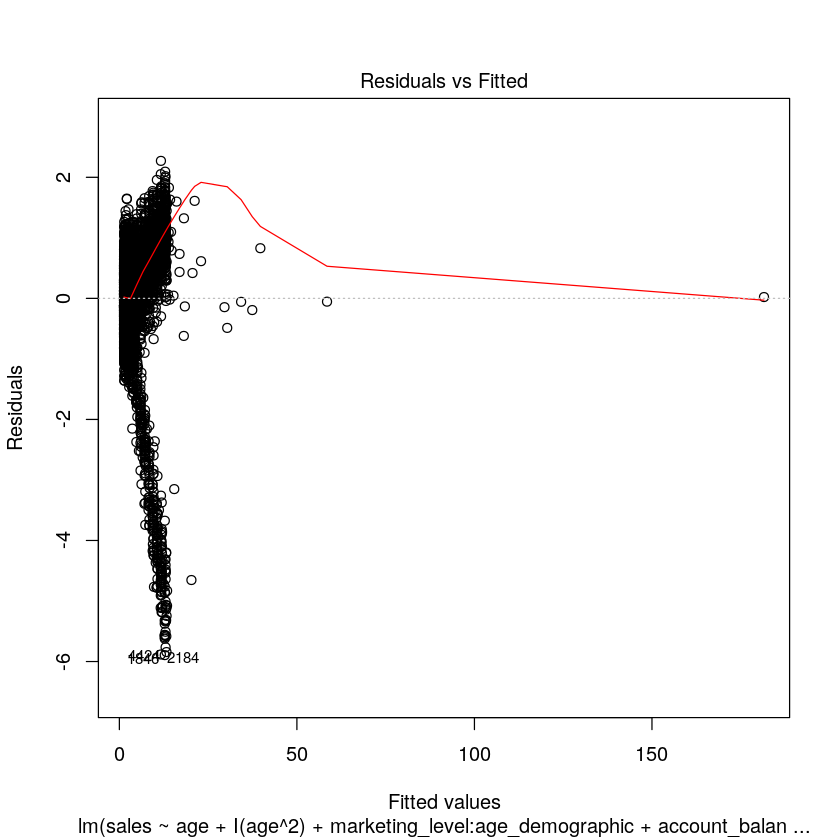

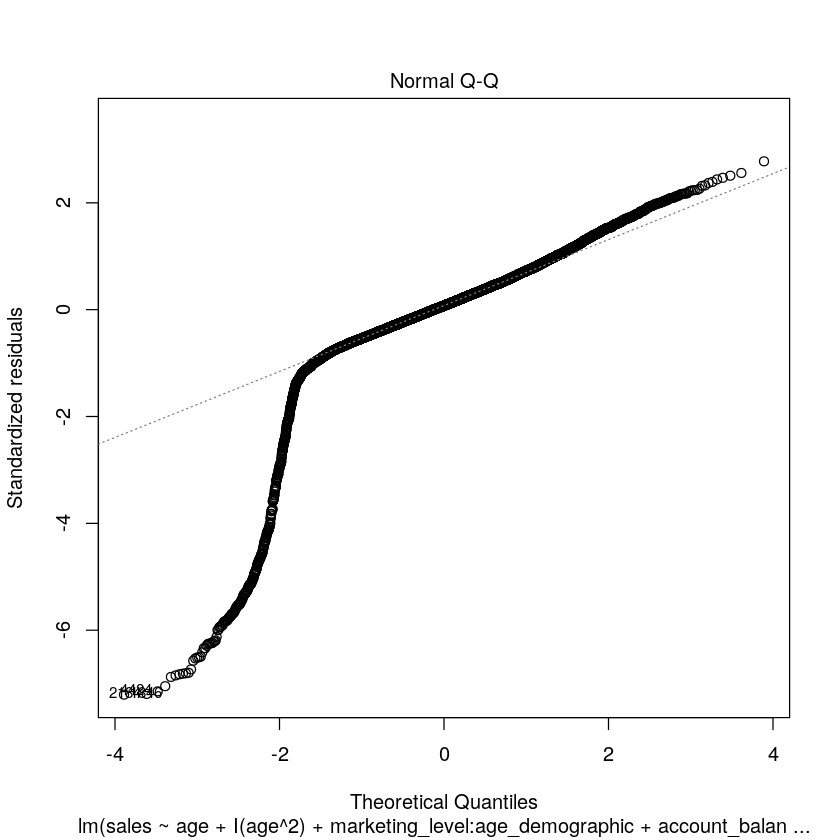

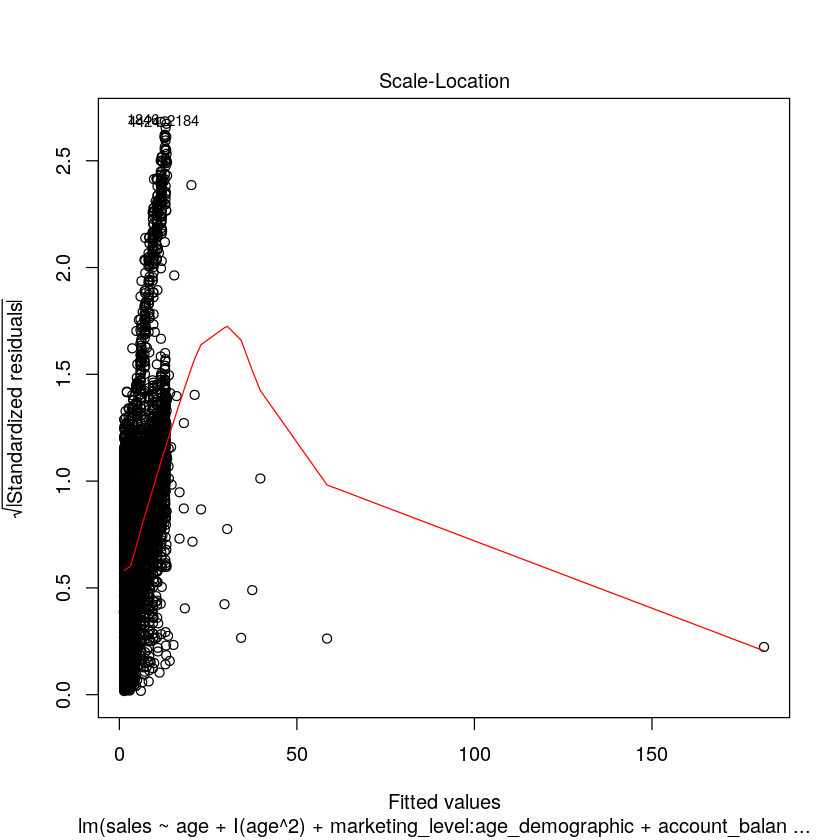

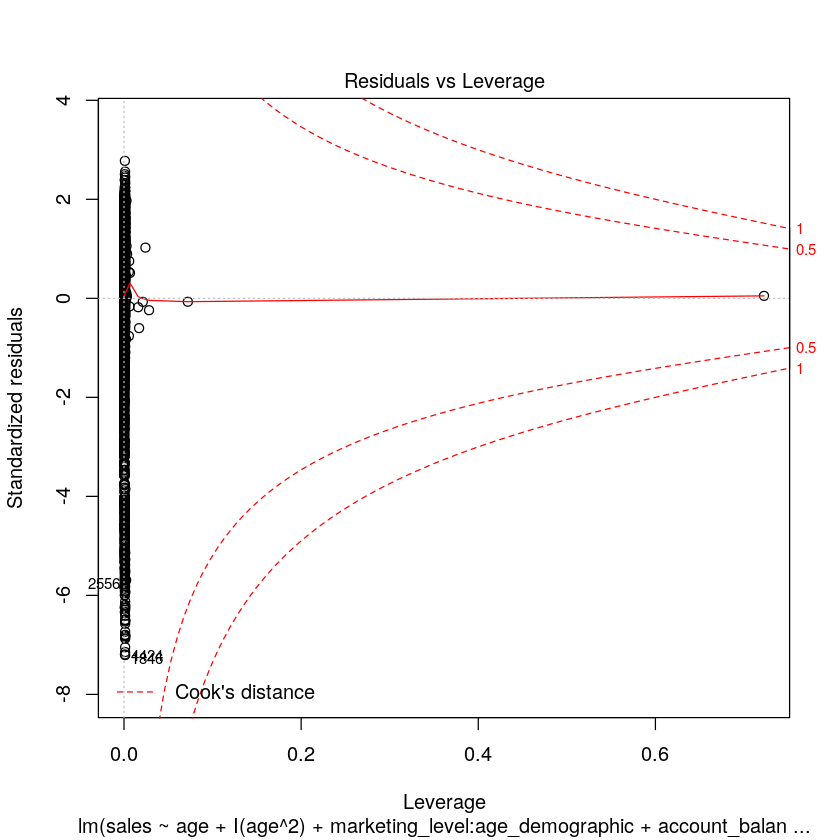

In [69]:
plot(mod3)

In [70]:
library(gvlma)

gvmod3 <- gvlma(mod3)
summary(gvmod3)


Call:
lm(formula = sales ~ age + I(age^2) + marketing_level:age_demographic + 
    account_balance, data = data_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8943 -0.2773  0.0592  0.4040  2.2713 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         2.032e+00  6.910e-02  29.405   <2e-16 ***
age                                -6.705e-02  3.580e-03 -18.726   <2e-16 ***
I(age^2)                            1.509e-03  4.347e-05  34.721   <2e-16 ***
account_balance                     5.000e-02  1.955e-04 255.766   <2e-16 ***
marketing_level:age_demographicno  -3.147e-03  2.935e-03  -1.072    0.284    
marketing_level:age_demographicyes  1.142e+00  3.912e-03 291.920   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8184 on 9994 degrees of freedom
Multiple R-squared:  0.9485,	Adjusted R-squared:  0.9484 
F-statistic: 3.678e+04 on 5 and 9994 DF,  p

In [71]:
mod4 <- lm(sales ~ age + I(age**2) + marketing_level:age_demographic, data=data_df)

mod5 <- lm(sales ~ I(age**2) + marketing_level:age_demographic, data=data_df)

anova(mod5, mod4)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
9996,50764.22,NA,NA,NA,NA
9995,50512.59,1,251.6269,49.78978,1.824916e-12


In [72]:
AIC(mod0, mod1, mod2, mod3, mod4, mod5)

,df,AIC
mod0,3,49934.38
mod1,3,54000.03
mod2,7,37709.50
mod3,7,24379.55
mod4,6,44587.15
mod5,5,44634.84


In [73]:
library(MASS)
mod6 <- lm(sales ~ age + I(age**2) + marketing_level:age_demographic + account_balance, 
           data=data_df)

In [74]:
stepAIC(mod6, direction="backward")

Start:  AIC=-4001.22
sales ~ age + I(age^2) + marketing_level:age_demographic + account_balance

                                  Df Sum of Sq   RSS     AIC
<none>                                          6694 -4001.2
- age                              1       235  6929 -3658.4
- I(age^2)                         1       808  7502 -2864.3
- account_balance                  1     43818 50513 16206.4
- marketing_level:age_demographic  2     78164 84858 21392.0



Call:
lm(formula = sales ~ age + I(age^2) + marketing_level:age_demographic + 
    account_balance, data = data_df)

Coefficients:
                       (Intercept)                                 age  
                          2.031974                           -0.067047  
                          I(age^2)                     account_balance  
                          0.001509                            0.049995  
 marketing_level:age_demographicno  marketing_level:age_demographicyes  
                         -0.003147                            1.141848  
